<a href="https://colab.research.google.com/github/mshahzaib101/Predicting-houses-prices-algorithm/blob/master/Predicting_houses_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

# Predicting house prices: a regression example


In [0]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 41.6MB/s 
     |████████████████████████████████| 450kB 41.6MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

In [0]:
train_targets.shape

(404,)

In [0]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Preparing the data


#### Data Normalization

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
from tensorflow.keras import models,layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores
np.mean(all_scores)

2.488453

In [0]:
from tensorflow.keras import backend as K

# Some memory clean-up
K.clear_session()

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
np.array(all_mae_histories).shape

(4, 500)

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [0]:

np.array(average_mae_history).shape

(500,)

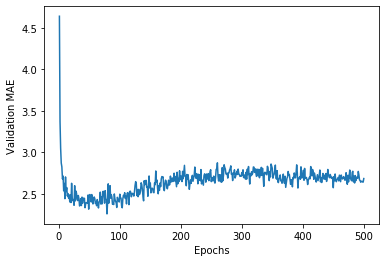

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
#  fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
result =model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 682us/sample - loss: 17.9473 - mae: 2.6200


In [0]:
result.history.keys()

dict_keys(['loss', 'mae'])

In [0]:
result.history['loss']

[502.6503534600286,
 321.2222589171759,
 152.37380505552386,
 71.01928976266692,
 45.29351823636801,
 34.214414417153534,
 28.1897235152745,
 24.030015416664654,
 21.66162910555849,
 18.989738672086506,
 17.43377398500348,
 15.849880482890818,
 14.76451539049054,
 13.493949994002238,
 12.95928176086728,
 12.125555354769867,
 11.673320883571511,
 11.1276164007659,
 11.037023279926565,
 10.368912687396058,
 10.172365443541272,
 9.997447599278818,
 9.800549148332955,
 9.50780485172083,
 9.555105114927386,
 9.48067276076515,
 9.104109397028932,
 9.263755703916644,
 9.00949750560345,
 8.651956954804978,
 8.996988971634666,
 8.66535493642977,
 8.584240752871674,
 8.491857769465682,
 8.213358945185595,
 8.255807687740514,
 8.35744073131297,
 8.219123457918073,
 8.12906021646934,
 8.02909779430616,
 7.805052417339665,
 7.479929074202434,
 7.998346272081432,
 7.6664179811383235,
 7.755874548808182,
 7.56640359316722,
 7.512698626754307,
 7.547354222524284,
 7.304590036373328,
 7.508961743647509

In [0]:
result.history['mae']

[20.330858,
 15.629051,
 9.697758,
 6.1771307,
 4.835541,
 4.209604,
 3.7537947,
 3.4511662,
 3.285378,
 3.042992,
 2.9072876,
 2.7807922,
 2.6718469,
 2.5942507,
 2.5403247,
 2.4835298,
 2.4053066,
 2.4126582,
 2.34049,
 2.2827373,
 2.2715175,
 2.2672873,
 2.202064,
 2.2094808,
 2.1846704,
 2.18275,
 2.1952927,
 2.1804438,
 2.1499524,
 2.130234,
 2.132094,
 2.0934258,
 2.0904708,
 2.0603704,
 2.0571856,
 2.0747502,
 2.0743608,
 2.0411046,
 2.033333,
 2.0419495,
 1.979513,
 1.9573302,
 2.0438511,
 1.9990312,
 1.9835738,
 1.9351639,
 1.9540468,
 1.9610354,
 1.8990461,
 1.9319022,
 1.940654,
 1.9298891,
 1.9140764,
 1.8908776,
 1.8978957,
 1.8864142,
 1.894495,
 1.8394698,
 1.9037148,
 1.8307868,
 1.8679918,
 1.8377391,
 1.8304466,
 1.8425378,
 1.820187,
 1.8200921,
 1.8411492,
 1.8053712,
 1.7982043,
 1.8138084,
 1.7781118,
 1.7716134,
 1.7856362,
 1.7162092,
 1.7657944,
 1.7613702,
 1.7347252,
 1.7705959,
 1.7156299,
 1.7359259]

In [0]:
print(test_mse_score, test_mae_score)

17.947343714096966 2.619955
